In [10]:
import torch
import torch.nn as nn
import numpy as np


In [11]:
# Load NN

class IsingNet(nn.Module):

  def __init__(self):

    super().__init__()
    self.input = nn.Linear(16, 64)
    self.output = nn.Linear(64, 1)

    self.act = nn.ReLU()

  def forward(self, x):
    x = self.act(self.input(x))
    y = self.output(x)
    return y
model = IsingNet()
model.load_state_dict(torch.load("/home/vv/IsingModelPractice/NN/rand_train_set.pth"))

model.eval()

IsingNet(
  (input): Linear(in_features=16, out_features=64, bias=True)
  (output): Linear(in_features=64, out_features=1, bias=True)
  (act): ReLU()
)

In [12]:
xy = np.loadtxt("/home/vv/IsingModelPractice/Data/Energy w All_4x4_flat.csv", delimiter=",", dtype=np.float32, skiprows=1)
y = [i for i in xy[:,0]]
x = [[i] for i in xy[:,1:17]]

In [13]:
posbl_abs_E = [0,4,8,12,16,20,24,32] #28 isn't possible
NN_errs_per_E = {}

# creates a dictionary with empty list for every |E|
for i in posbl_abs_E:
    NN_errs_per_E[i]=[]

# this chooses the closest class of predicted value
# i.e. regression to classification
def closest_abs_E(y_pred):
    acc = np.abs(y_pred)
    best = 0
    for i in posbl_abs_E:
        err = np.abs(i-np.abs(y_pred))
        if err <= acc:
            acc = err
            best = i
    return best

# this passes all of the data for testsing 
# for predicted E, append the error to corresponding list
# i.e. outcome is 15 lists with errors for given E 
for i in range(65536):
    y_pred = model(torch.as_tensor(x[i])).item()
    y_pred_class = closest_abs_E(y_pred)
    
    err = np.abs(y[i]-y_pred)
    NN_errs_per_E[y_pred_class].append(err)

# Get the average error for each E
NN_avg_err_per_E = []

for i in posbl_abs_E:
    NN_avg_err_per_E.append(sum(NN_errs_per_E[i])/len(NN_errs_per_E[i]))
    

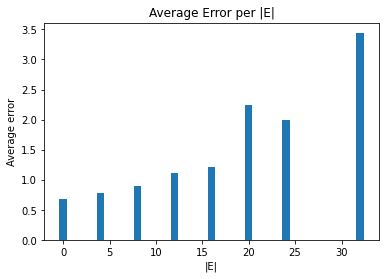

In [14]:
import matplotlib.pyplot as plt

plt.bar(NN_errs_per_E.keys(), NN_avg_err_per_E)
plt.title("Average Error per |E|")
plt.xlabel("|E|")
plt.ylabel("Average error")
plt.show()


In [15]:
print(NN_avg_err_per_E)

[0.6822225739095981, 0.788099919877293, 0.9064528542717704, 1.1211194176486234, 1.2237441275681422, 2.2481098295767095, 1.9992618560791016, 3.436095714569092]


#### This two cell bellow Generate a graph similar to one above
### The goal is to show the effect of lack of exaples on predictive ability

In [16]:
example_per_E = {}
# initate the dict of lists
for i in posbl_abs_E:
    example_per_E[i]=[]

# listing examples per |E|
for i in range(65536):
    Y = np.abs(y[i])
    example_per_E[Y].append(Y)

len_exmps_per_E = []
# exmaples to # per |E|
for i in posbl_abs_E:
    len_exmps_per_E.append(len(example_per_E[i]))

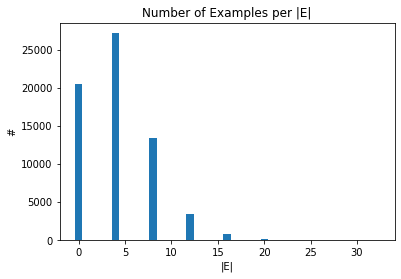

In [17]:
plt.bar(NN_errs_per_E.keys(), len_exmps_per_E)
plt.title("Number of Examples per |E|")
plt.xlabel("|E|")
plt.ylabel("#")
plt.show()